In [20]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import leastsq
import math

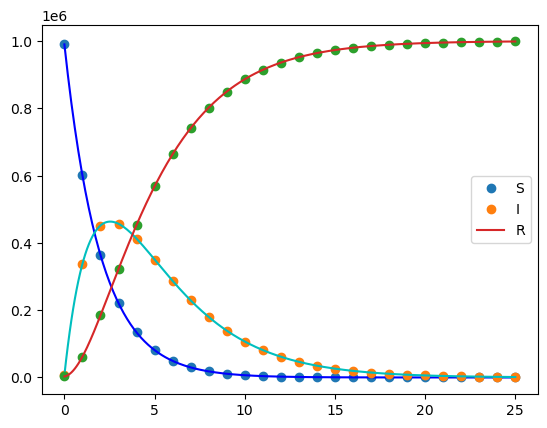

In [21]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0,25

time = np.linspace(t0, tf, 26)
more_time = np.linspace(t0, tf, 260)

def dSdt(t, S):
    return -alpha*S


def dIdt(t, I):
    return alpha * solnS.sol(t) - beta * I


solnS = integrate.solve_ivp(dSdt, (t0, tf), [S], t_eval = time,  dense_output=True)
tS, yS = solnS.t, solnS.y[0]
solnI = integrate.solve_ivp(dIdt, (t0, tf), [I], t_eval = time,   dense_output=True)
tI, yI = solnI.t, solnI.y[0]


yR = [N - yS[i] - yI[i] for i in range(26)]
solnR = interp1d(time, yR, kind='cubic')
tR = time


plt.plot(tS, yS, 'o', label='S')
plt.plot(more_time, solnS.sol(more_time)[0], color='b')
plt.plot(tI, yI, 'o', label='I')
plt.plot(more_time, solnI.sol(more_time)[0], color='c')
plt.plot(tR, yR, 'o')
plt.plot(more_time,solnR(more_time), label = 'R')


plt.legend()
plt.show()

In [132]:
def funcS(x, a, S0):
    return S0*(math.e ** (-a*x)) 

def diffS(args, y, x):
    a, S0 = args
    return y - funcS(x, a, S0)

def funcI(x, a, S0, I0):
    return (I0 + a * S0 * x ) * (math.e ** (-a*x)) 

def diffI(args, y, x):
    a, S0, I0 = args
    return y - funcI(x, a, S0, I0)

C:\Users\misha\AppData\Local\Temp\ipykernel_11076\1359113229.py:2: RuntimeWarning: overflow encountered in power
  return S0*(math.e ** (-a*x))
C:\Users\misha\AppData\Local\Temp\ipykernel_11076\1359113229.py:2: RuntimeWarning: overflow encountered in multiply
  return S0*(math.e ** (-a*x))


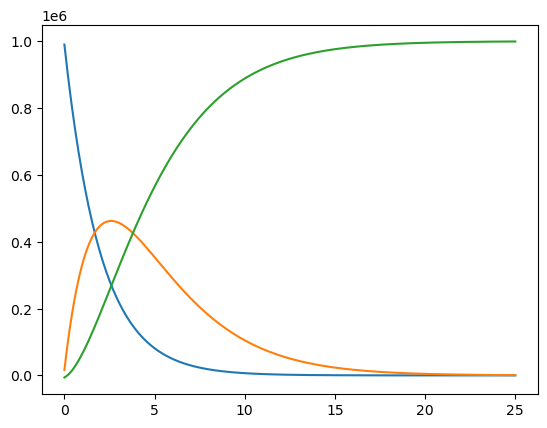

In [134]:
x = more_time
yS = solnS.sol(x)[0]
a_S, _ = leastsq(diffS, (1, 1), args=(yS, x))
plt.plot(x,funcS(x,a_S[0], a_S[1]))

yI = solnI.sol(x)[0]
a_I, _ = leastsq(diffI, (*a_S, 7000), args = (yI, x))
plt.plot(x,funcI(x, a_I[0], a_I[1], a_I[2]))


yR = [N - funcS(x0, a_S[0], a_S[1]) - funcI(x0, a_I[0], a_I[1], a_I[2]) for x0 in x]
plt.plot(x,yR)